# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
!wget https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv

--2020-10-30 03:20:11--  https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 426412 (416K) [text/plain]
Saving to: ‘appl_1980_2014.csv’

appl_1980_2014.csv  100%[===================>] 416.42K  --.-KB/s    in 0.07s   

2020-10-30 03:20:12 (5.61 MB/s) - ‘appl_1980_2014.csv’ saved [426412/426412]



### Step 3. Assign it to a variable apple

In [26]:
apple = pd.read_csv('appl_1980_2014.csv', sep = ',')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [27]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [17]:
# Method 1 - if we want to change dtype for many cols at a time, this is good , but we dont have control on how we want to format our cols
apple = apple.astype({'Date': 'datetime64[ns]'})
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [28]:
# Method 2 - if we just want to change col to datetime, this might be a better one as we can control date format
apple['Date']=pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [50]:
apple.set_index(['Date'], inplace=True)
apple.index[:5]

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01'],
              dtype='datetime64[ns]', name=u'Date', freq=None)

### Step 7.  Is there any duplicate dates?

In [77]:
# Method 1 - general way using methods of pandas series
apple.index.duplicated().sum()

0

In [102]:
# Method 2 - using the unique method for df's index ('index' specific thus preferable)
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [51]:
apple.sort_index(ascending=False).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 9. Get the last business day of each month 
Note: [stackoverflow answer on resample documentation](https://stackoverflow.com/questions/17001389/pandas-resample-documentation)

In [103]:
# df or series 'timeseries-index' specific thus preferable (If we want to groupby df by last business days of each year-month)
apple.resample('BM').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
1981-05-29,29.052000,29.188000,28.995000,28.995000,7.380240e+06,0.452500
1981-06-30,30.801818,30.876364,30.703636,30.703636,1.080189e+07,0.477727
1981-07-31,24.436364,24.531818,24.374545,24.374545,7.584436e+06,0.379545
1981-08-31,22.336500,22.386500,22.218500,22.218500,6.857760e+06,0.345000


### Step 10.  What is the difference in days between the first day and the oldest

In [94]:
(apple.index.max()-apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [141]:
pd.DataFrame({'Year': apple.index.year, 'Month': apple.index.month}).drop_duplicates().shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

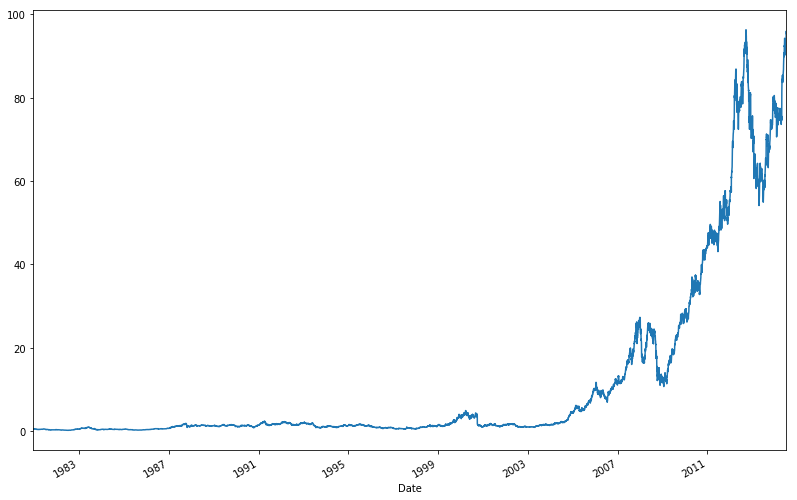

In [101]:
apple['Adj Close'].plot(figsize=(13.5, 9), kind='line')

### BONUS: Create your own question and answer it.